
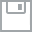
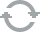
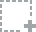
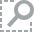
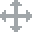
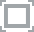
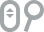
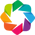
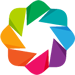
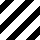
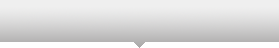
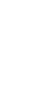
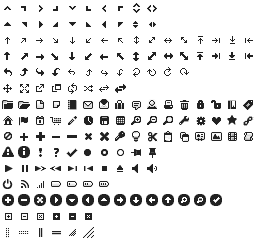
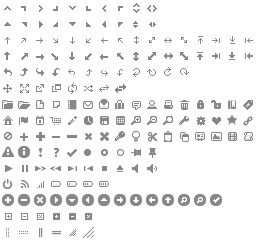
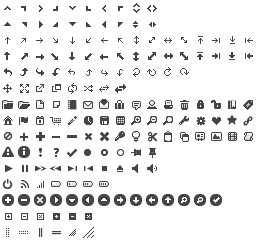
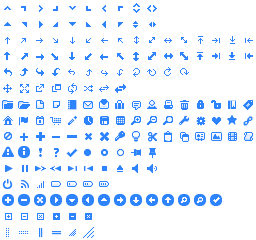
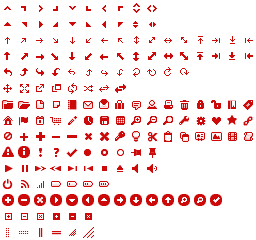
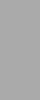

In [1]:
import numpy as np
from collections import OrderedDict

from bokeh.io import output_notebook, show
from bokeh.models import ColumnDataSource, BoxAnnotation, Label
from bokeh.plotting import figure
from bokeh.sampledata.les_mis import data
output_notebook()

In [70]:
nodes = data['nodes']
names = [node['name'] for node in sorted(data['nodes'], key=lambda x: x['group'])]
reversed_names = list(reversed(names))
N = len(nodes)
counts = np.zeros((N, N))
for link in data['links']:
    counts[link['source'], link['target']] = link['value']
    counts[link['target'], link['source']] = link['value']

colormap = [
    "#444444", "#a6cee3", "#1f78b4", "#b2df8a", "#33a02c", "#fb9a99",
    "#e31a1c", "#fdbf6f", "#ff7f00", "#cab2d6", "#6a3d9a"
]

xname = []
yname = []
color = []
alpha = []
for i, n1 in enumerate(nodes):
    for j, n2 in enumerate(nodes):
        xname.append(n1['name'])
        yname.append(n2['name'])

        a = min(counts[i,j]/4.0, 0.9) + 0.1
        alpha.append(a)

        if n1['group'] == n2['group']:
            color.append(colormap[n1['group']])
        else:
            color.append('lightgrey')


source = ColumnDataSource(
    data=dict(
        xname=xname,
        yname=yname,
        colors=color,
        alphas=alpha,
        count=counts.flatten(),
    )
)

In [100]:
# Set p the plot as per the original example
p = figure(
    title="Les Mis Occurrences",
    x_axis_location="above",
    tools="",
    x_range=reversed_names, 
    y_range=names,
    width=800,
    height=800)

p.rect('xname', 'yname', 0.9, 0.9, source=source, color='colors', alpha='alphas', line_color=None)

p.grid.grid_line_color = None
p.axis.axis_line_color = None
p.axis.major_tick_line_color = None
p.axis.major_label_text_font_size = "5pt"
p.axis.major_label_standoff = 0
p.xaxis.major_label_orientation = np.pi/3

# Add boxes over major groupings

p.add_layout(
    BoxAnnotation(
        left='Child1', right='Jondrette',
        top='Child1', bottom='Jondrette',
        fill_color=None, fill_alpha=0,
        line_color='orange', line_width=6,
    )
)
p.add_layout(
    BoxAnnotation(
        left='Woman2', right='Fantine',
        top='Woman2', bottom='Fantine',
        fill_color=None, fill_alpha=0,
        line_color='green', line_width=6,
    )
)
p.add_layout(
    BoxAnnotation(
        left='Tholomyes', right='Count',
        top='Tholomyes', bottom='Count',
        fill_color=None, fill_alpha=0,
        line_color=(49,121,177), line_width=6,
    )
)
# Add text labels
p.add_layout(
    Label(
        #angle, # tested
        #angle_units, # tested
        #background_fill_alpha, # tested 
        #background_fill_color, # tested
        border_line_alpha=0.9, # tested
        border_line_cap='round', # tested
        border_line_color='pink', # tested
        border_line_dash='dotdash', # tested
        #border_line_dash_offset,
        #border_line_join,
        border_line_width=3, 
        label_text_align='left', # tested
        label_text_alpha=0.8, # tested
        label_text_baseline='bottom', # tested
        label_text_color='orange', # tested
        label_text_font='Comic Sans MS', # tested
        label_text_font_size='32pt', # tested
        label_text_font_style='italic', # tested
        level='image', # tested - image seems to put it slightly below data - what is underlay meant to do
        #name, # not tested 
        #plot, # not tested
        #tags, # not tested
        text='Cluster 1', # Tested
        x=reversed_names.index('Jondrette'), # tested - not ideal for categorical
        x_offset=150,
        #x_range_name, # not tested
        #x_units,
        y=names.index('Jondrette'),
        y_offset=-50,
        #y_range_name, # not tested
        y_units='data'
    )
)
p.add_layout(
    Label(
        #angle,
        #angle_units,
        background_fill_alpha=0.6,
        background_fill_color=(22,33,44),
        label_text_align='center', 
        label_text_alpha=0.4, 
        label_text_baseline='top', 
        label_text_color='green', 
        label_text_font='Georgia',
        label_text_font_size='24pt',
        label_text_font_style='bold',
        text='Cluster 2', 
        x=500, 
        x_units='screen',
        y=names.index('Fantine'),
    )
)

p.add_layout(
    Label(
        angle=180, # also tested np.pi
        angle_units='deg',
        label_text_align='left', 
        label_text_alpha=0.4, 
        label_text_baseline='alphabetic', 
        label_text_color=(49,121,177), 
        label_text_font='Impact',
        label_text_font_size='12pt',
        label_text_font_style='bold',
        text='Cluster 3', 
        x=reversed_names.index('Count'), 
        y=names.index('Count'),
    )
)

show(p)